In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [275]:
df=pd.read_csv("AB_NYC_2019.csv")

In [276]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [278]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [279]:
df['neighbourhood_group']=df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood']=df['neighbourhood'].astype("category").cat.codes
df['room_type']=df['room_type'].astype("category").cat.codes
df['price_log'] = np.log(df.price+1)

In [280]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [281]:
df=df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])


In [282]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [283]:
df.dtypes

neighbourhood_group                  int8
neighbourhood                       int16
latitude                          float64
longitude                         float64
room_type                            int8
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price_log                         float64
dtype: object

In [284]:
import seaborn as sns

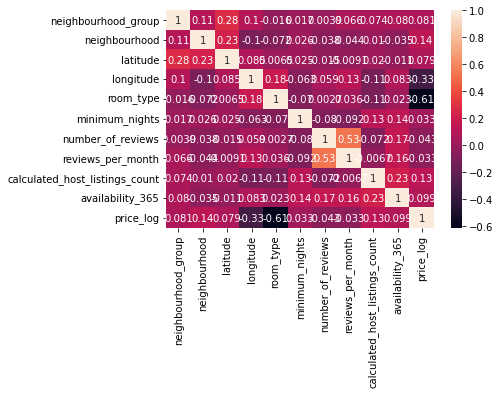

In [285]:
sns.heatmap(df.corr(),annot=True)

In [286]:
y=df["price_log"]

In [287]:
X=df.drop("price_log",axis=1)

In [288]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [289]:
print(y.shape)
print(X.shape)

(48895,)
(48895, 10)


In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,shuffle=False)

In [292]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [293]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet


In [294]:
alphas=[1,0.1,0.01,0.001,0.0001]

In [295]:
def linear_reg(X_train,X_test,y_train,y_test):
    test_scores=[]
    train_scores=[]
    linearModel=LinearRegression()
    linearModel.fit(X_train,y_train)
    trainScore=linearModel.score(X_train,y_train)
    testScore=linearModel.score(X_test,y_test)
    print("Train Score:",trainScore,"\nTest Score:",testScore)

In [296]:
def ridge_reg(X_train,X_test,y_train,y_test,alphas):
    for alpha_value in alphas:
        ridgeModel=Ridge(alpha=alpha_value,max_iter=100000).fit(X_train,y_train)
        train_score=ridgeModel.score(X_train,y_train)
        test_score=ridgeModel.score(X_test,y_test)
        print('Ridge Reg train score {} % alpha = {} '.format(train_score*100,alpha_value))
        print('Ridge Reg test score {} % alpha = {} '.format(test_score*100,alpha_value))
        print("----------------------------------------------------------")
    

In [297]:
def lasso_reg(X_train,X_test,y_train,y_test,alphas):
    for alpha_value in alphas:
        lassoModel=Lasso(alpha=alpha_value,max_iter=100000).fit(X_train,y_train)
        train_score=lassoModel.score(X_train,y_train)
        test_score=(lassoModel.score(X_test,y_test))
        print('Lasso Reg train score {} % alpha = {} '.format(train_score*100,alpha_value))
        print('Lasso Reg test score {} % alpha = {} '.format(test_score*100,alpha_value))
        print("----------------------------------------------------------")


In [298]:
def elasticnet_reg(X_train,X_test,y_train,y_test,alphas):
    
    for alpha_value in alphas:
        elasticModel=ElasticNet(alpha=alpha_value,max_iter=100000).fit(X_train,y_train)
        train_score=elasticModel.score(X_train,y_train)
        test_score=elasticModel.score(X_test,y_test)
        
        print('Elasticnet Reg train score {} % alpha = {} '.format(train_score*100,alpha_value))
        print('Elasticnet Reg test score {} % alpha = {} '.format(test_score*100,alpha_value))
        print("----------------------------------------------------------")

In [299]:
linear_reg(X_train,X_test,y_train,y_test)

Train Score: 0.48830411299279974 
Test Score: 0.5276626590602871


In [300]:
ridge_reg(X_train,X_test,y_train,y_test,alphas)

Ridge Reg train score 48.830409552078876 % alpha = 1 
Ridge Reg test score 52.76407144045883 % alpha = 1 
----------------------------------------------------------
Ridge Reg train score 48.83041128162393 % alpha = 0.1 
Ridge Reg test score 52.766044173135775 % alpha = 0.1 
----------------------------------------------------------
Ridge Reg train score 48.830411299103226 % alpha = 0.01 
Ridge Reg test score 52.7662437097765 % alpha = 0.01 
----------------------------------------------------------
Ridge Reg train score 48.83041129927821 % alpha = 0.001 
Ridge Reg test score 52.76626368617372 % alpha = 0.001 
----------------------------------------------------------
Ridge Reg train score 48.83041129927995 % alpha = 0.0001 
Ridge Reg test score 52.76626568404086 % alpha = 0.0001 
----------------------------------------------------------


In [301]:
lasso_reg(X_train,X_test,y_train,y_test,alphas)

Lasso Reg train score 0.0 % alpha = 1 
Lasso Reg test score -0.7656555343531268 % alpha = 1 
----------------------------------------------------------
Lasso Reg train score 37.17227996901524 % alpha = 0.1 
Lasso Reg test score 38.330792245195425 % alpha = 0.1 
----------------------------------------------------------
Lasso Reg train score 47.63529687648923 % alpha = 0.01 
Lasso Reg test score 52.46762079495739 % alpha = 0.01 
----------------------------------------------------------
Lasso Reg train score 48.74953718939927 % alpha = 0.001 
Lasso Reg test score 53.05908750657329 % alpha = 0.001 
----------------------------------------------------------
Lasso Reg train score 48.82866311201338 % alpha = 0.0001 
Lasso Reg test score 52.733419271950055 % alpha = 0.0001 
----------------------------------------------------------


In [302]:
elasticnet_reg(X_train,X_test,y_train,y_test,alphas)

Elasticnet Reg train score 0.0 % alpha = 1 
Elasticnet Reg test score -0.7656555343531268 % alpha = 1 
----------------------------------------------------------
Elasticnet Reg train score 41.77659994019991 % alpha = 0.1 
Elasticnet Reg test score 44.32336605824223 % alpha = 0.1 
----------------------------------------------------------
Elasticnet Reg train score 48.26391762277433 % alpha = 0.01 
Elasticnet Reg test score 53.33617815509113 % alpha = 0.01 
----------------------------------------------------------
Elasticnet Reg train score 48.793641636076366 % alpha = 0.001 
Elasticnet Reg test score 52.66548088049462 % alpha = 0.001 
----------------------------------------------------------
Elasticnet Reg train score 48.82987685093375 % alpha = 0.0001 
Elasticnet Reg test score 52.74778183181792 % alpha = 0.0001 
----------------------------------------------------------
